In [65]:
import pandas as pd

file_name = "./data/mac_stat(110605_240729).csv"
df = pd.read_csv(file_name, encoding='EUC-KR')

df.info()
df.describe()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668500 entries, 0 to 668499
Data columns (total 28 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   위판일자     668500 non-null  object 
 1   경매장소코드   668500 non-null  object 
 2   매수번호     668500 non-null  int64  
 3   매수일련번호   668500 non-null  int64  
 4   출하번호     668500 non-null  int64  
 5   어업코드     668500 non-null  int64  
 6   어업명      668500 non-null  object 
 7   어선번호     641846 non-null  float64
 8   어선명      642882 non-null  object 
 9   상품코드     668500 non-null  int64  
 10  상품명      668500 non-null  object 
 11  어종상태코드   668500 non-null  int64  
 12  어종상태명    668500 non-null  object 
 13  산지코드     668400 non-null  float64
 14  산지명      647554 non-null  object 
 15  사업장명     668500 non-null  object 
 16  조합명      668500 non-null  object 
 17  원산지구분코드  668500 non-null  int64  
 18  원산지구분명   668500 non-null  object 
 19  출하수량     668500 non-null  int64  
 20  출하중량     668500 non-null  

,위판일자,경매장소코드,매수번호,매수일련번호,출하번호,어업코드,어업명,어선번호,어선명,상품코드,...,원산지구분명,출하수량,출하중량,출하금액,위판수량,위판단량,위판중량,위판단가,위판금액,등록일시
0,2024-07-29,001,76,7,969447,271,정치망어업,9.811004e+13,황영호,21000646,...,국산,225,567,2008110,1.0,5.0,5.0,42100.0,42100,2024-07-29


In [66]:
print(df.columns)              # 컬럼명 출력
print(list(df.columns)) 

Index(['위판일자', '경매장소코드', '매수번호', '매수일련번호', '출하번호', '어업코드', '어업명', '어선번호',
       '어선명', '상품코드', '상품명', '어종상태코드', '어종상태명', '산지코드', '산지명', '사업장명', '조합명',
       '원산지구분코드', '원산지구분명', '출하수량', '출하중량', '출하금액', '위판수량', '위판단량', '위판중량',
       '위판단가', '위판금액', '등록일시'],
      dtype='object')
['위판일자', '경매장소코드', '매수번호', '매수일련번호', '출하번호', '어업코드', '어업명', '어선번호', '어선명', '상품코드', '상품명', '어종상태코드', '어종상태명', '산지코드', '산지명', '사업장명', '조합명', '원산지구분코드', '원산지구분명', '출하수량', '출하중량', '출하금액', '위판수량', '위판단량', '위판중량', '위판단가', '위판금액', '등록일시']


In [67]:
# 고등어로 통일할 상품명 리스트
mackerel_names = [
    '고등어(20미)', '고등어', '고등어류', '고등어(15미)', '기타고등어',
    '고등어(냉)', '고등어(선)', '고등어(냉동)', '선동고등어', '고등어(선망)',
    '고등어,소', '고등어류(선어)', '고등어(10kg이하)', '고등어(소)',
    '고등어(10-15kg)', '고등어(중)', '고등어(12)', '고등어(25미)',
    '고등어小', '고등어中', '고등어비급', '고등어,중', '고등어(상)', '(반.고등어)'
]

# 상품명 변경
df['상품명'] = df['상품명'].apply(lambda x: '고등어' if x in mackerel_names else x)
df = df[df['상품명'].isin(['고등어', '고등어大'])]



In [68]:
df_org = df[['위판일자', '출하수량', '출하중량', '출하금액', '산지명',  '어업명', '어선번호', '어선명', '상품코드', '상품명', '산지코드']]
df_org

,위판일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,산지코드
0,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
1,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
2,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
3,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
4,2024-07-29,1484,3212,9483200,강원도,정치망어업,5.110026e+12,제7홍일호,21000646,고등어,920000.0
...,...,...,...,...,...,...,...,...,...,...,...
668495,2011-09-08,2630,49450,83780000,NaN,대형트롤어업,9.610006e+13,27신화,21008452,고등어,NaN
668496,2011-08-30,13,73,719000,NaN,근해연승어업,2.040046e+12,202장덕호,21004204,고등어大,217000.0
668497,2011-07-04,134,1069,9884000,NaN,근해안강망어업,7.020046e+12,제5백성호,21004204,고등어大,217000.0
668498,2011-06-11,165,340,2160400,NaN,연안개량안강망어업,1.050016e+12,77선경호,21004204,고등어大,217000.0


In [69]:
# 결측치 채우기 (산지코드=산지명)
df_org['산지명'] = df_org.groupby('산지코드')['산지명'].transform(lambda x: x.ffill())

# 경고 제거를 위한 타입 명시
df_org = df_org.infer_objects(copy=False)

In [70]:
# 예: object 타입이었던 컬럼을 자동으로 float로 바꿔줌
df_org['어선번호'].dtype  # 원래는 object
df_org = df_org.infer_objects(copy=False)
df_org['어선번호'].dtype  # 이제는 float64


dtype('float64')

In [9]:
df_org.info()
df_org.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 655541 entries, 0 to 668499
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   위판일자    655541 non-null  object 
 1   출하수량    655541 non-null  int64  
 2   출하중량    655541 non-null  int64  
 3   출하금액    655541 non-null  int64  
 4   산지명     634779 non-null  object 
 5   어업명     655541 non-null  object 
 6   어선번호    629010 non-null  float64
 7   어선명     630048 non-null  object 
 8   상품코드    655541 non-null  int64  
 9   상품명     655541 non-null  object 
 10  산지코드    655442 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 60.0+ MB


,출하수량,출하중량,출하금액,어선번호,상품코드,산지코드
count,655541.000000,6.555410e+05,6.555410e+05,6.290100e+05,6.555410e+05,655442.000000
mean,284.310344,4.437321e+03,1.510238e+07,2.942551e+13,2.100458e+07,951940.838228
std,922.783954,2.962864e+04,3.363475e+07,3.710394e+13,1.123363e+04,77662.282622
min,0.000000,0.000000e+00,1.000000e+03,0.000000e+00,2.100006e+07,0.000000
25%,23.000000,2.100000e+02,1.176800e+06,5.050046e+12,2.100263e+07,930000.000000
50%,68.000000,6.110000e+02,3.082940e+06,1.306004e+13,2.100308e+07,980000.000000
75%,226.000000,2.321000e+03,1.461110e+07,2.105003e+13,2.100420e+07,990000.000000
max,87600.000000,1.183562e+07,8.740630e+08,9.912026e+13,2.115139e+07,990000.000000


In [ ]:
#df_org['산지명'] = df_org['산지명'].fillna('미상')


In [ ]:
#df_org

,위판일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,산지코드
0,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
1,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
2,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
3,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0
4,2024-07-29,1484,3212,9483200,강원도,정치망어업,5.110026e+12,제7홍일호,21000646,고등어,920000.0
...,...,...,...,...,...,...,...,...,...,...,...
668495,2011-09-08,2630,49450,83780000,미상,대형트롤어업,9.610006e+13,27신화,21008452,고등어,NaN
668496,2011-08-30,13,73,719000,미상,근해연승어업,2.040046e+12,202장덕호,21004204,고등어大,217000.0
668497,2011-07-04,134,1069,9884000,미상,근해안강망어업,7.020046e+12,제5백성호,21004204,고등어大,217000.0
668498,2011-06-11,165,340,2160400,미상,연안개량안강망어업,1.050016e+12,77선경호,21004204,고등어大,217000.0


In [71]:
df_org['위판일자'] = pd.to_datetime(df_org['위판일자'])
df_org['연도'] = df_org['위판일자'].dt.year
df_org['월'] = df_org['위판일자'].dt.month
df_org['일'] = df_org['위판일자'].dt.day
df_org['연월'] = df_org['위판일자'].dt.to_period('M').astype(str)
# NaN은 그대로 두고, 숫자만 int로 변환
# df_org['어선번호'] = df_org['어선번호'].apply(lambda x: int(x) if pd.notnull(x) else x)


In [13]:
df_org

,위판일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,산지코드,연도,월,일,연월
0,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
1,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
2,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
3,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
4,2024-07-29,1484,3212,9483200,강원도,정치망어업,5.110026e+12,제7홍일호,21000646,고등어,920000.0,2024,7,29,2024-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668495,2011-09-08,2630,49450,83780000,미상,대형트롤어업,9.610006e+13,27신화,21008452,고등어,NaN,2011,9,8,2011-09
668496,2011-08-30,13,73,719000,미상,근해연승어업,2.040046e+12,202장덕호,21004204,고등어大,217000.0,2011,8,30,2011-08
668497,2011-07-04,134,1069,9884000,미상,근해안강망어업,7.020046e+12,제5백성호,21004204,고등어大,217000.0,2011,7,4,2011-07
668498,2011-06-11,165,340,2160400,미상,연안개량안강망어업,1.050016e+12,77선경호,21004204,고등어大,217000.0,2011,6,11,2011-06


In [14]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655541 entries, 0 to 668499
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   위판일자    655541 non-null  datetime64[ns]
 1   출하수량    655541 non-null  int64         
 2   출하중량    655541 non-null  int64         
 3   출하금액    655541 non-null  int64         
 4   산지명     655541 non-null  object        
 5   어업명     655541 non-null  object        
 6   어선번호    629010 non-null  float64       
 7   어선명     630048 non-null  object        
 8   상품코드    655541 non-null  int64         
 9   상품명     655541 non-null  object        
 10  산지코드    655442 non-null  float64       
 11  연도      655541 non-null  int32         
 12  월       655541 non-null  int32         
 13  일       655541 non-null  int32         
 14  연월      655541 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(5)
memory usage: 72.5+ MB


In [15]:
df_org

,위판일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,산지코드,연도,월,일,연월
0,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
1,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
2,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
3,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07
4,2024-07-29,1484,3212,9483200,강원도,정치망어업,5.110026e+12,제7홍일호,21000646,고등어,920000.0,2024,7,29,2024-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668495,2011-09-08,2630,49450,83780000,미상,대형트롤어업,9.610006e+13,27신화,21008452,고등어,NaN,2011,9,8,2011-09
668496,2011-08-30,13,73,719000,미상,근해연승어업,2.040046e+12,202장덕호,21004204,고등어大,217000.0,2011,8,30,2011-08
668497,2011-07-04,134,1069,9884000,미상,근해안강망어업,7.020046e+12,제5백성호,21004204,고등어大,217000.0,2011,7,4,2011-07
668498,2011-06-11,165,340,2160400,미상,연안개량안강망어업,1.050016e+12,77선경호,21004204,고등어大,217000.0,2011,6,11,2011-06


In [ ]:
#df_org.loc[df_org['산지코드'].isna(), '산지명'] = '미상'


In [18]:
file_name = "./data/어선번호_어선명_선적항.csv"
df_ship = pd.read_csv(file_name)

In [72]:
df_ship_unique = df_ship.drop_duplicates(subset='어선번호')


In [75]:
df_merged = df_org.merge(df_ship_unique[['어선번호', '선적항']], on='어선번호', how='left')

In [ ]:
#df_merged['선적항'] = df_merged['선적항'].fillna('미상')


In [76]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655541 entries, 0 to 655540
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   위판일자    655541 non-null  datetime64[ns]
 1   출하수량    655541 non-null  int64         
 2   출하중량    655541 non-null  int64         
 3   출하금액    655541 non-null  int64         
 4   산지명     634779 non-null  object        
 5   어업명     655541 non-null  object        
 6   어선번호    629010 non-null  float64       
 7   어선명     630048 non-null  object        
 8   상품코드    655541 non-null  int64         
 9   상품명     655541 non-null  object        
 10  산지코드    655442 non-null  float64       
 11  연도      655541 non-null  int32         
 12  월       655541 non-null  int32         
 13  일       655541 non-null  int32         
 14  연월      655541 non-null  object        
 15  선적항     624884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(6)
memory usa

In [77]:
df_merged

,위판일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,산지코드,연도,월,일,연월,선적항
0,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07,강원 동해시
1,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07,강원 동해시
2,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07,강원 동해시
3,2024-07-29,225,567,2008110,강원도,정치망어업,9.811004e+13,황영호,21000646,고등어,920000.0,2024,7,29,2024-07,강원 동해시
4,2024-07-29,1484,3212,9483200,강원도,정치망어업,5.110026e+12,제7홍일호,21000646,고등어,920000.0,2024,7,29,2024-07,강원 동해시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655536,2011-09-08,2630,49450,83780000,NaN,대형트롤어업,9.610006e+13,27신화,21008452,고등어,NaN,2011,9,8,2011-09,부산시 서구
655537,2011-08-30,13,73,719000,NaN,근해연승어업,2.040046e+12,202장덕호,21004204,고등어大,217000.0,2011,8,30,2011-08,충남 서천군 장항읍
655538,2011-07-04,134,1069,9884000,NaN,근해안강망어업,7.020046e+12,제5백성호,21004204,고등어大,217000.0,2011,7,4,2011-07,충청남도 서천군
655539,2011-06-11,165,340,2160400,NaN,연안개량안강망어업,1.050016e+12,77선경호,21004204,고등어大,217000.0,2011,6,11,2011-06,충남 서천군 장항읍


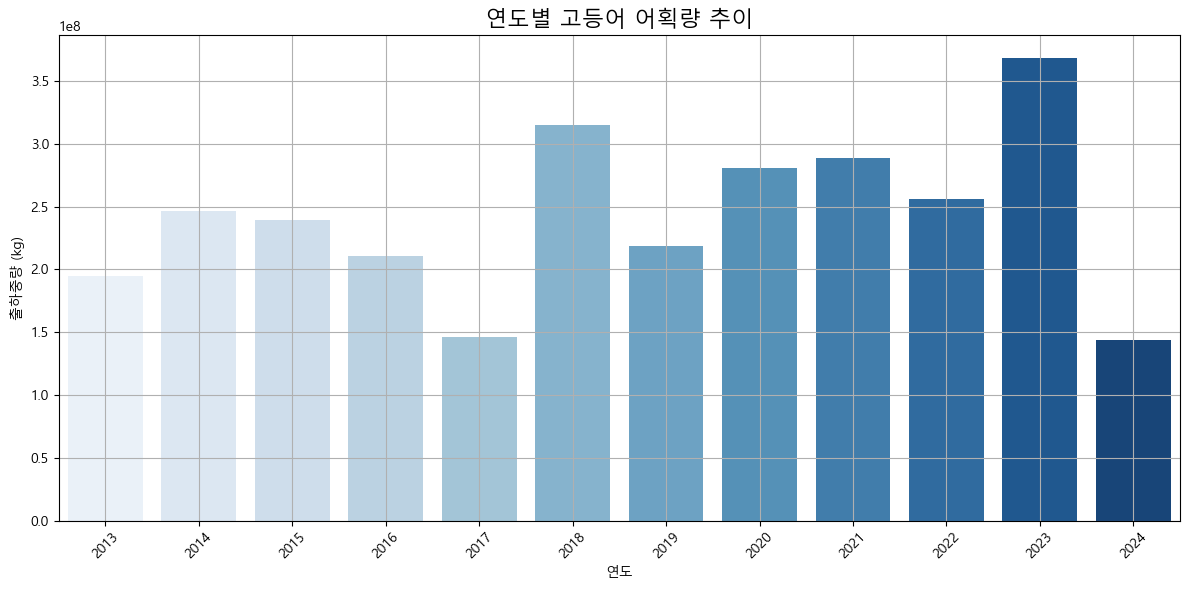

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm

# 경고 제거
warnings.filterwarnings('ignore')

# 한글 글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

# 연도별 출하중량 집계
yearly_mackerel = df_merged.groupby('연도')['출하중량'].sum().reset_index()

# 2011, 2012 제외 (오류떠서 일시적으로 제외함)
yearly_mackerel = yearly_mackerel[~yearly_mackerel['연도'].isin([2011, 2012])]

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(data=yearly_mackerel, x='연도', y='출하중량', palette='Blues')
plt.title('연도별 고등어 어획량 추이', fontsize=16)
plt.xlabel('연도')
plt.ylabel('출하중량 (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



In [78]:
# 2013년부터 2023년까지의 데이터만 남기기
df_filtered = df_merged[(df_merged['연도'] >= 2013) & (df_merged['연도'] <= 2023)]
df_filtered.head(1)
df_filtered.info()
df_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 612701 entries, 42831 to 655531
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   위판일자    612701 non-null  datetime64[ns]
 1   출하수량    612701 non-null  int64         
 2   출하중량    612701 non-null  int64         
 3   출하금액    612701 non-null  int64         
 4   산지명     591948 non-null  object        
 5   어업명     612701 non-null  object        
 6   어선번호    586821 non-null  float64       
 7   어선명     587872 non-null  object        
 8   상품코드    612701 non-null  int64         
 9   상품명     612701 non-null  object        
 10  산지코드    612603 non-null  float64       
 11  연도      612701 non-null  int32         
 12  월       612701 non-null  int32         
 13  일       612701 non-null  int32         
 14  연월      612701 non-null  object        
 15  선적항     583121 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(6)
memory usag

,위판일자,출하수량,출하중량,출하금액,어선번호,상품코드,산지코드,연도,월,일
count,612701,612701.000000,6.127010e+05,6.127010e+05,5.868210e+05,6.127010e+05,612603.000000,612701.000000,612701.000000,612701.000000
mean,2019-02-12 05:08:26.519819264,288.214122,4.512865e+03,1.535256e+07,3.012481e+13,2.100464e+07,951359.000674,2018.523210,7.640247,15.863083
min,2013-01-01 00:00:00,0.000000,0.000000e+00,1.000000e+03,0.000000e+00,2.100006e+07,0.000000,2013.000000,1.000000,1.000000
25%,2016-07-07 00:00:00,23.000000,2.080000e+02,1.185000e+06,5.050016e+12,2.100263e+07,930000.000000,2016.000000,6.000000,8.000000
50%,2019-04-17 00:00:00,68.000000,6.000000e+02,3.056400e+06,1.305004e+13,2.100308e+07,980000.000000,2019.000000,8.000000,16.000000
75%,2021-10-27 00:00:00,231.000000,2.365000e+03,1.482200e+07,2.109002e+13,2.100420e+07,990000.000000,2021.000000,10.000000,23.000000
max,2023-12-31 00:00:00,87600.000000,1.183562e+07,8.740630e+08,9.912026e+13,2.115139e+07,990000.000000,2023.000000,12.000000,31.000000
std,NaN,930.213700,3.048740e+04,3.421339e+07,3.775022e+13,1.151285e+04,79851.894469,3.189936,3.101963,8.669805


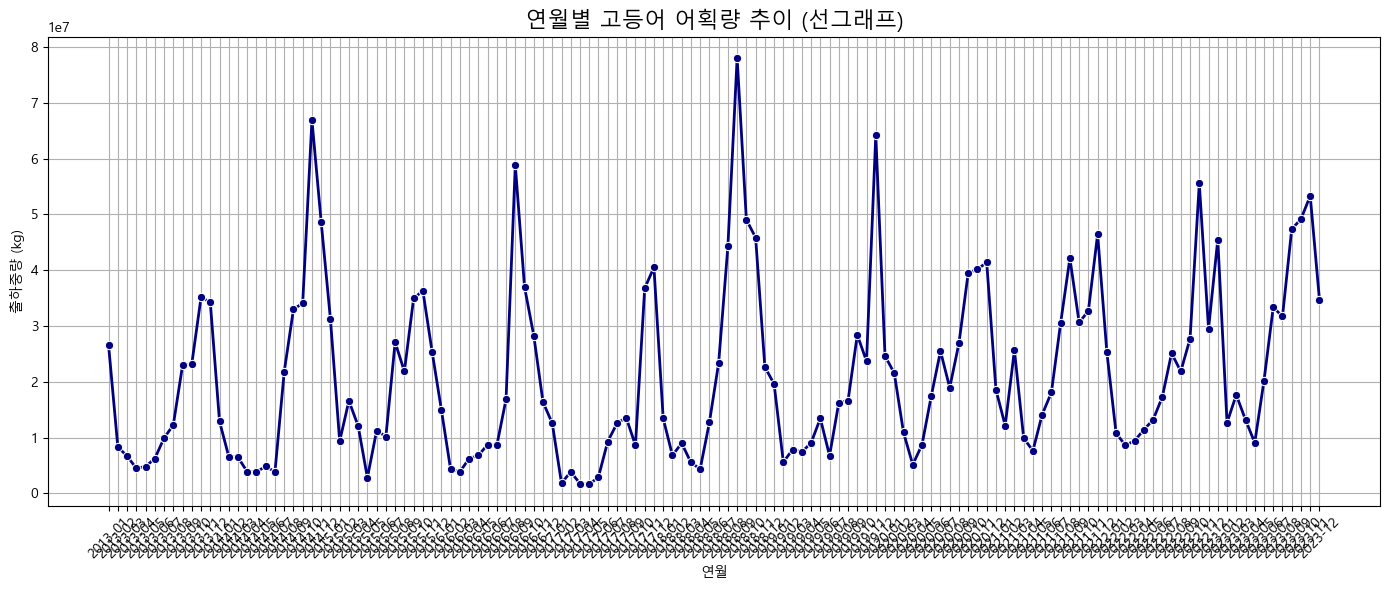

In [27]:
monthly_by_year = df_filtered.groupby('연월')['출하중량'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_by_year, x='연월', y='출하중량', marker='o', linewidth=2, color='navy')
plt.title('연월별 고등어 어획량 추이 (선그래프)', fontsize=16)
plt.xlabel('연월')
plt.ylabel('출하중량 (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
monthly_by_year

,연월,출하중량
0,2013-01,26524914
1,2013-02,8337772
2,2013-03,6691201
3,2013-04,4516707
4,2013-05,4814396
...,...,...
127,2023-08,31706749
128,2023-09,47354781
129,2023-10,49150468
130,2023-11,53314085


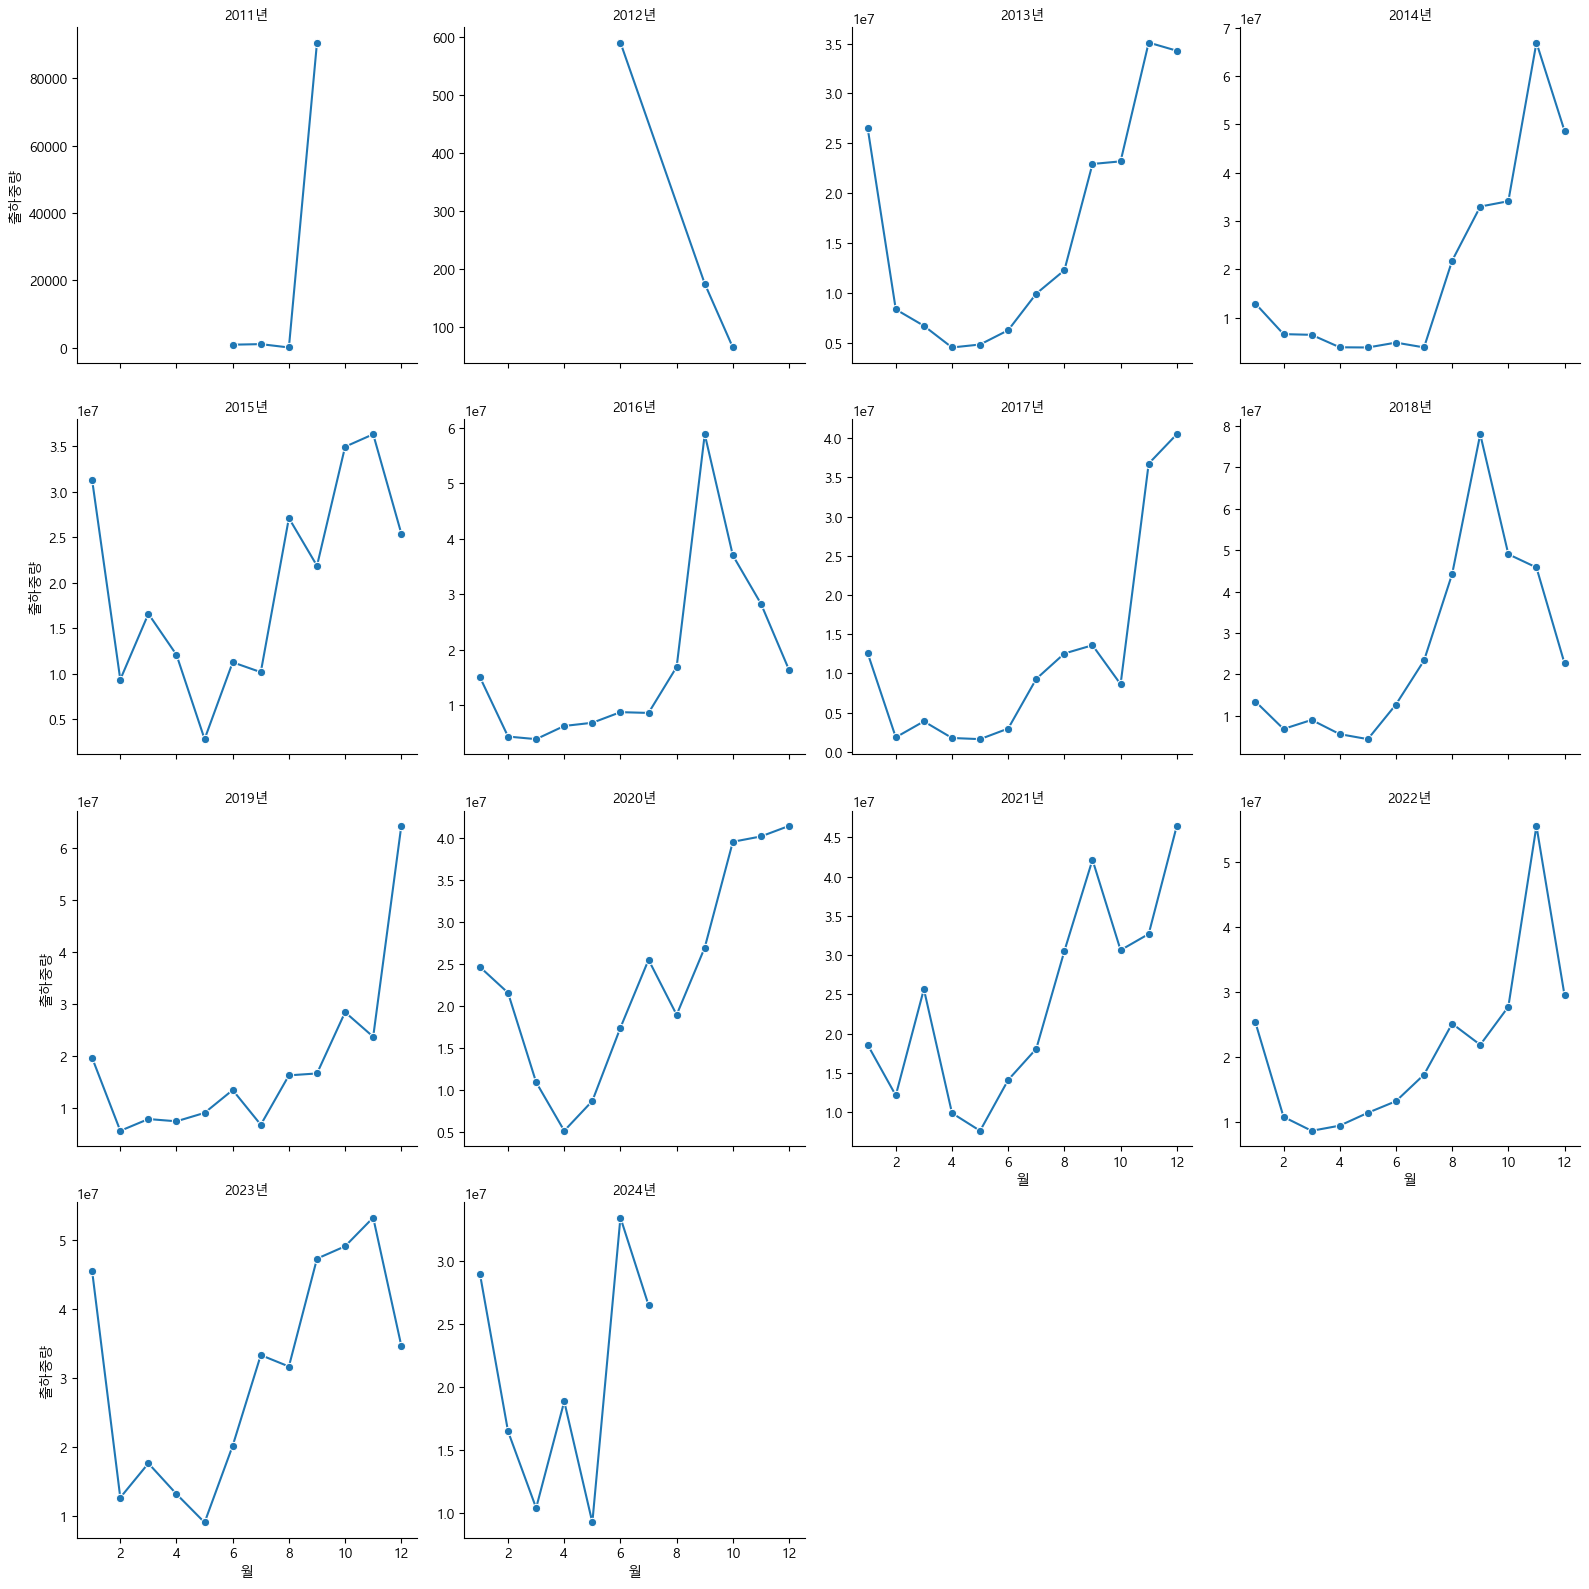

In [29]:
df_org['연도'] = df_org['위판일자'].dt.year
monthly_by_year = df_org.groupby(['연도', '월'])['출하중량'].sum().reset_index()

# 연월 문자열 생성
monthly_by_year['연월'] = monthly_by_year['연도'].astype(str) + '-' + monthly_by_year['월'].astype(str).str.zfill(2)

# 연도별 subplot
g = sns.FacetGrid(monthly_by_year, col='연도', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, '월', '출하중량', marker='o')
g.set_titles("{col_name}년")
g.set_axis_labels("월", "출하중량")
plt.tight_layout()
plt.show()


In [30]:
df_org['연도'] = df_org['위판일자'].dt.year
df_org['월'] = df_org['위판일자'].dt.month

monthly_by_year = df_org.groupby(['연도', '월'])['출하중량'].sum().reset_index()

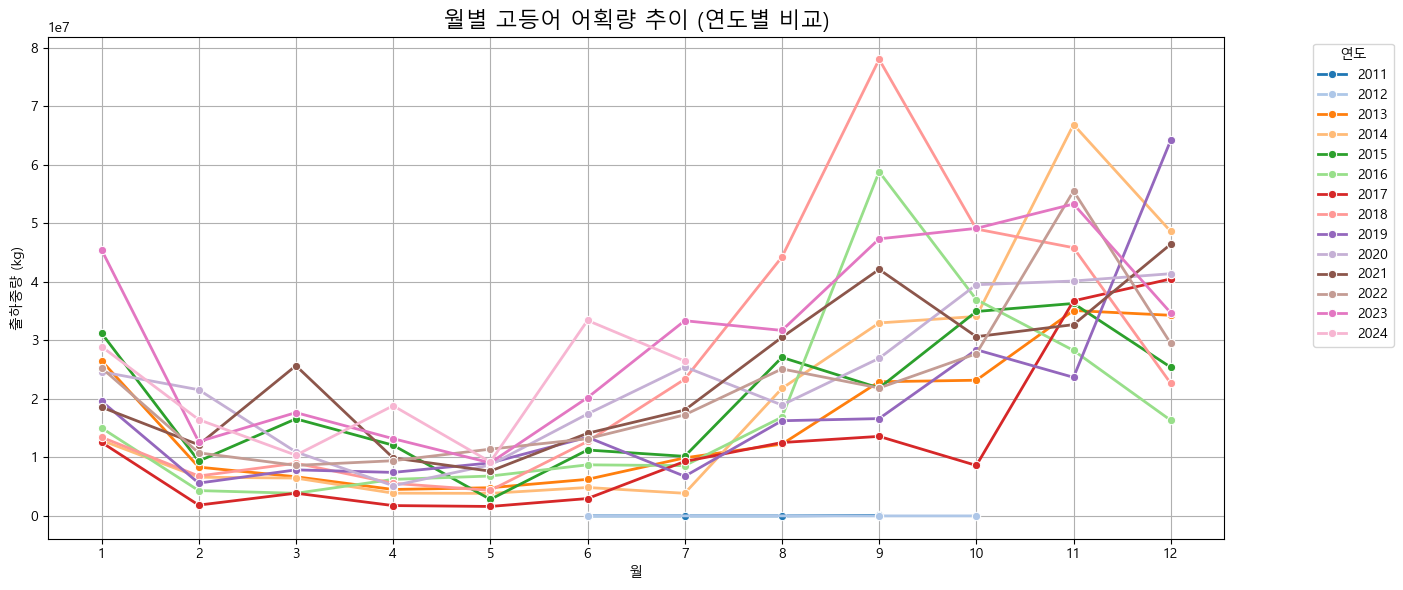

In [31]:
unique_years = monthly_by_year['연도'].unique()
palette = sns.color_palette('tab20', n_colors=len(unique_years))  # 최대 20가지 색상

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_by_year, x='월', y='출하중량', hue='연도', palette=palette, marker='o', linewidth=2)

plt.title('월별 고등어 어획량 추이 (연도별 비교)', fontsize=16)
plt.xlabel('월')
plt.ylabel('출하중량 (kg)')
plt.xticks(range(1,13))  # 1~12월 고정
plt.grid(True)

# 범례 설정: 모든 연도 표시되도록
plt.legend(title='연도', loc='upper right', bbox_to_anchor=(1.15, 1), ncol=1)

plt.tight_layout()
plt.show()

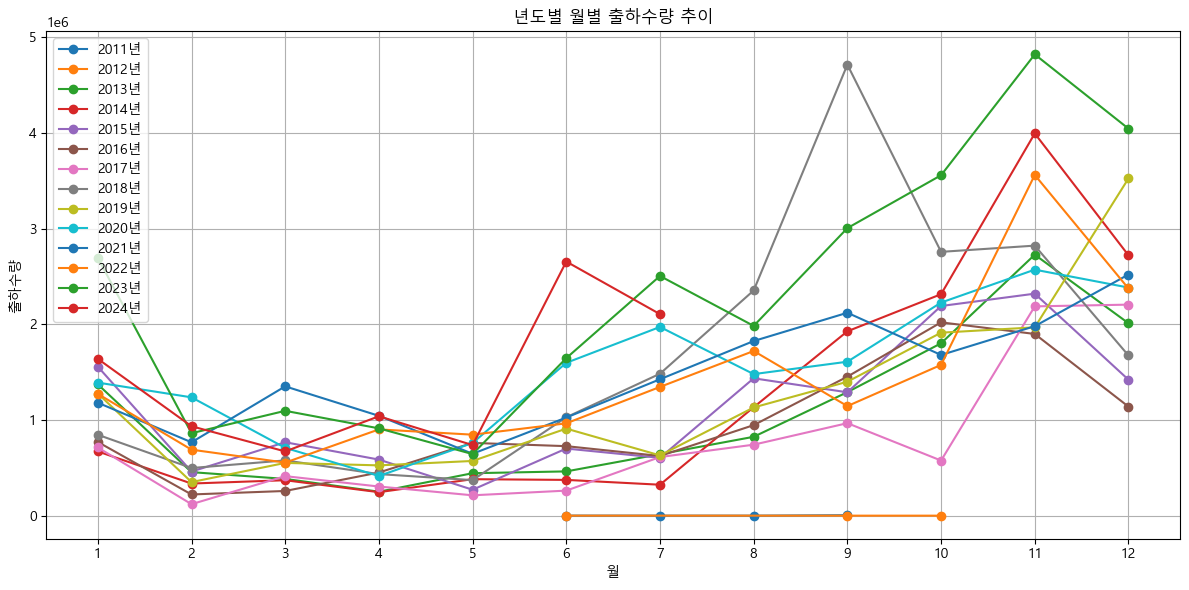

In [32]:
# 월별 출하수량 집계
monthly_by_year = df_merged.groupby(['연도', '월'])['출하수량'].sum().reset_index()

# 월을 x축으로, 년도별 선 그래프 그리기
plt.figure(figsize=(12, 6))
for year in sorted(monthly_by_year['연도'].unique()):
    data = monthly_by_year[monthly_by_year['연도'] == year]
    plt.plot(data['월'], data['출하수량'], label=f'{year}년', marker='o')

plt.title('년도별 월별 출하수량 추이')
plt.xlabel('월')
plt.ylabel('출하수량')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()




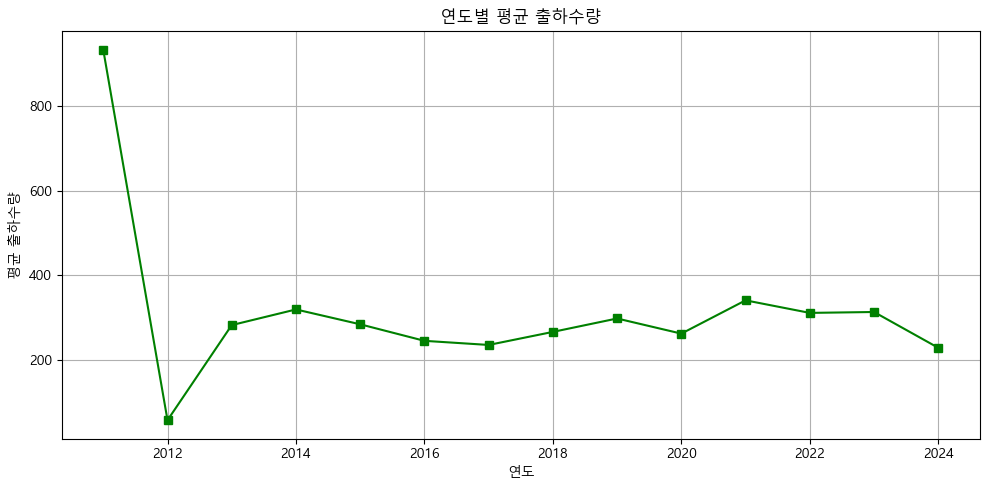

In [33]:
# 연도별 평균 출하수량 계산
yearly_avg = df_merged.groupby('연도')['출하수량'].mean().reset_index()

# 선 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['연도'], yearly_avg['출하수량'], marker='s', color='green')

plt.title('연도별 평균 출하수량')
plt.xlabel('연도')
plt.ylabel('평균 출하수량')
plt.grid(True)
plt.tight_layout()
plt.show()


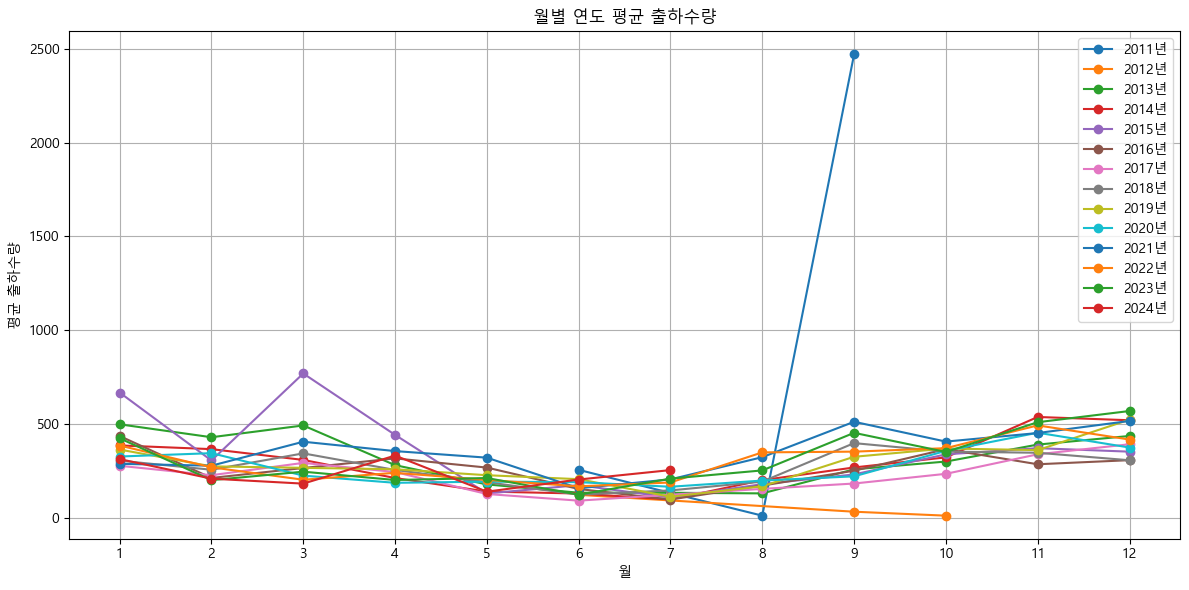

In [34]:
# 월별 연도별 평균 출하수량 계산
monthly_avg_by_year = df_merged.groupby(['월', '연도'])['출하수량'].mean().reset_index()

# 월 기준으로 정렬
monthly_avg_by_year = monthly_avg_by_year.sort_values('월')

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
for year in sorted(monthly_avg_by_year['연도'].unique()):
    data = monthly_avg_by_year[monthly_avg_by_year['연도'] == year]
    plt.plot(data['월'], data['출하수량'], label=f'{year}년', marker='o')

plt.title('월별 연도 평균 출하수량')
plt.xlabel('월')
plt.ylabel('평균 출하수량')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# import pandas as pd

# # 저장 경로 지정
# save_path = "./data/고등어_어획량.xlsx"

# # 엑셀 파일로 저장
# df_merged.to_excel(save_path, index=False)


In [36]:
df_2011 = df_merged[df_merged['연도'] == 2011]

df_2011.sort_values('출하수량', ascending=False).head(10)


,위판일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,산지코드,연도,월,일,연월,선적항
655536,2011-09-08,2630,49450,83780000,미상,대형트롤어업,9.610006e+13,27신화,21008452,고등어,NaN,2011,9,8,2011-09,부산시 서구
655535,2011-09-09,2310,41166,86548000,미상,대형트롤어업,9.411015e+13,제65세명호,21008452,고등어,217000.0,2011,9,9,2011-09,부산시 서구
655540,2011-06-05,349,563,4110560,미상,연안안강망어업,1.303003e+13,만성호,21004204,고등어大,217000.0,2011,6,5,2011-06,전북 부안군 위도면
655539,2011-06-11,165,340,2160400,미상,연안개량안강망어업,1.050016e+12,77선경호,21004204,고등어大,217000.0,2011,6,11,2011-06,충남 서천군 장항읍
655538,2011-07-04,134,1069,9884000,미상,근해안강망어업,7.020046e+12,제5백성호,21004204,고등어大,217000.0,2011,7,4,2011-07,충청남도 서천군
655537,2011-08-30,13,73,719000,미상,근해연승어업,2.040046e+12,202장덕호,21004204,고등어大,217000.0,2011,8,30,2011-08,충남 서천군 장항읍


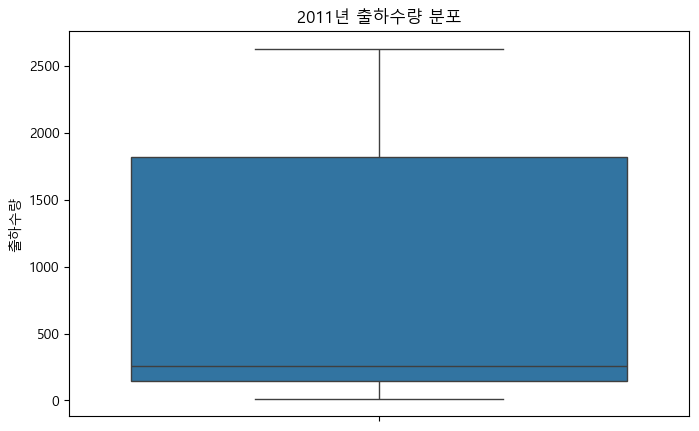

In [37]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_2011, y='출하수량')
plt.title('2011년 출하수량 분포')
plt.show()


In [79]:
# 2013년부터 2023년까지의 데이터만 남기기
df_filtered = df_merged[(df_merged['연도'] >= 2013) & (df_merged['연도'] <= 2023)]
df_filtered.head(1)
df_filtered.info()
df_filtered.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 612701 entries, 42831 to 655531
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   위판일자    612701 non-null  datetime64[ns]
 1   출하수량    612701 non-null  int64         
 2   출하중량    612701 non-null  int64         
 3   출하금액    612701 non-null  int64         
 4   산지명     591948 non-null  object        
 5   어업명     612701 non-null  object        
 6   어선번호    586821 non-null  float64       
 7   어선명     587872 non-null  object        
 8   상품코드    612701 non-null  int64         
 9   상품명     612701 non-null  object        
 10  산지코드    612603 non-null  float64       
 11  연도      612701 non-null  int32         
 12  월       612701 non-null  int32         
 13  일       612701 non-null  int32         
 14  연월      612701 non-null  object        
 15  선적항     583121 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(6)
memory usag

,위판일자,출하수량,출하중량,출하금액,어선번호,상품코드,산지코드,연도,월,일
count,612701,612701.000000,6.127010e+05,6.127010e+05,5.868210e+05,6.127010e+05,612603.000000,612701.000000,612701.000000,612701.000000
mean,2019-02-12 05:08:26.519819264,288.214122,4.512865e+03,1.535256e+07,3.012481e+13,2.100464e+07,951359.000674,2018.523210,7.640247,15.863083
min,2013-01-01 00:00:00,0.000000,0.000000e+00,1.000000e+03,0.000000e+00,2.100006e+07,0.000000,2013.000000,1.000000,1.000000
25%,2016-07-07 00:00:00,23.000000,2.080000e+02,1.185000e+06,5.050016e+12,2.100263e+07,930000.000000,2016.000000,6.000000,8.000000
50%,2019-04-17 00:00:00,68.000000,6.000000e+02,3.056400e+06,1.305004e+13,2.100308e+07,980000.000000,2019.000000,8.000000,16.000000
75%,2021-10-27 00:00:00,231.000000,2.365000e+03,1.482200e+07,2.109002e+13,2.100420e+07,990000.000000,2021.000000,10.000000,23.000000
max,2023-12-31 00:00:00,87600.000000,1.183562e+07,8.740630e+08,9.912026e+13,2.115139e+07,990000.000000,2023.000000,12.000000,31.000000
std,NaN,930.213700,3.048740e+04,3.421339e+07,3.775022e+13,1.151285e+04,79851.894469,3.189936,3.101963,8.669805


In [39]:
# # 저장 경로 지정
# save_path = "./data/고등어_출하량_2013_2023.xlsx"

# # 엑셀 파일로 저장
# df_filtered.to_excel(save_path, index=False)

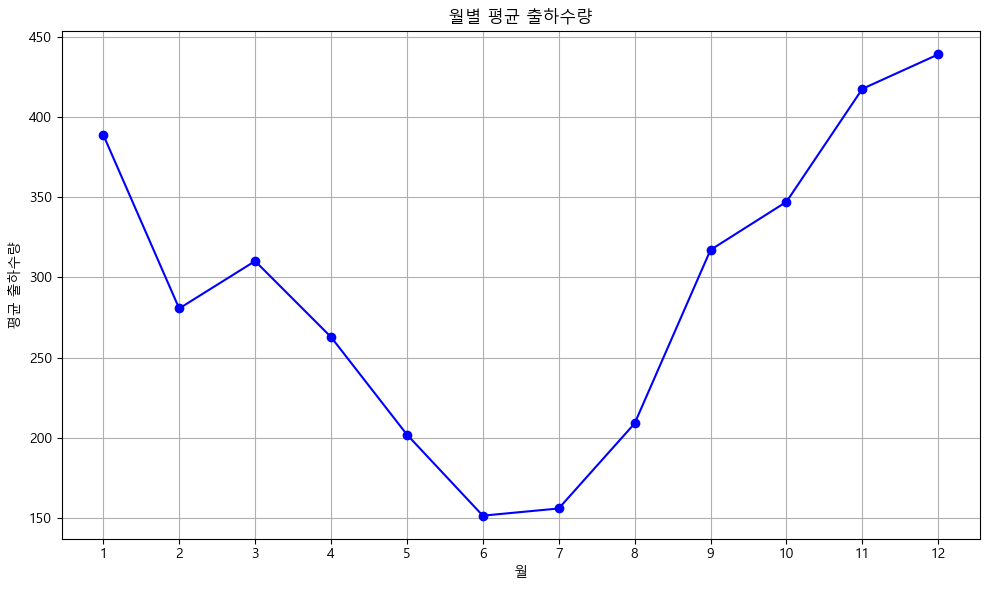

In [40]:
# 월별 평균 출하수량 계산
monthly_avg = df_filtered.groupby('월')['출하수량'].mean().reset_index()

# 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg['월'], monthly_avg['출하수량'], marker='o', linestyle='-', color='blue')

plt.title('월별 평균 출하수량')
plt.xlabel('월')
plt.ylabel('평균 출하수량')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


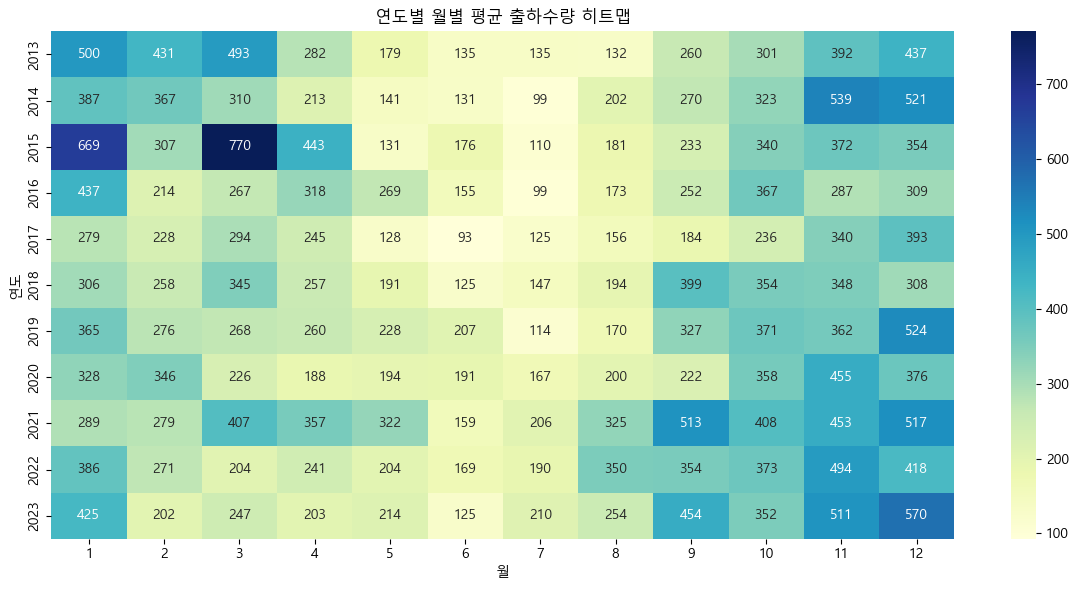

In [41]:
# 연도-월별 평균 출하수량 계산
pivot_table = df_filtered.groupby(['연도', '월'])['출하수량'].mean().unstack()

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')

plt.title('연도별 월별 평균 출하수량 히트맵')
plt.xlabel('월')
plt.ylabel('연도')
plt.tight_layout()
plt.show()


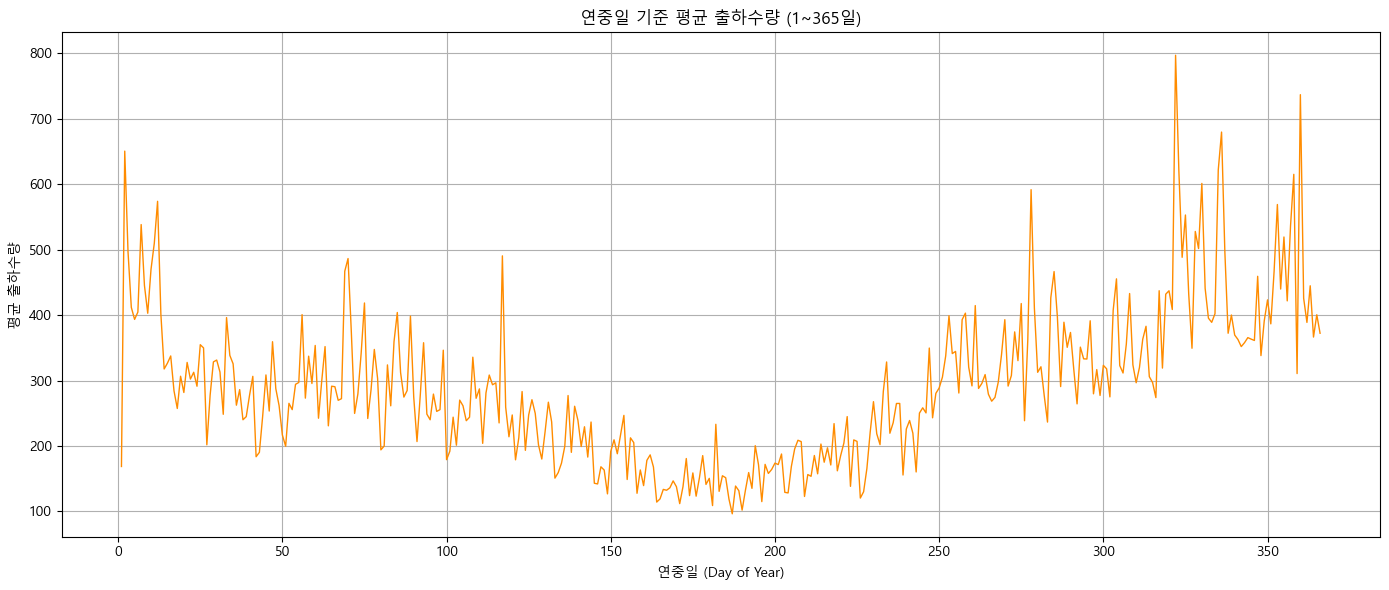

In [42]:

# '위판일자' 기준으로 연중 몇 번째 날인지 계산
df_filtered['연중일'] = df_filtered['위판일자'].dt.dayofyear

# 연중일 기준으로 평균 출하수량 계산
daily_avg_by_day = df_filtered.groupby('연중일')['출하수량'].mean().reset_index()

# 선 그래프 그리기
plt.figure(figsize=(14, 6))
plt.plot(daily_avg_by_day['연중일'], daily_avg_by_day['출하수량'], color='darkorange', linewidth=1)

plt.title('연중일 기준 평균 출하수량 (1~365일)')
plt.xlabel('연중일 (Day of Year)')
plt.ylabel('평균 출하수량')
plt.grid(True)
plt.tight_layout()
plt.show()


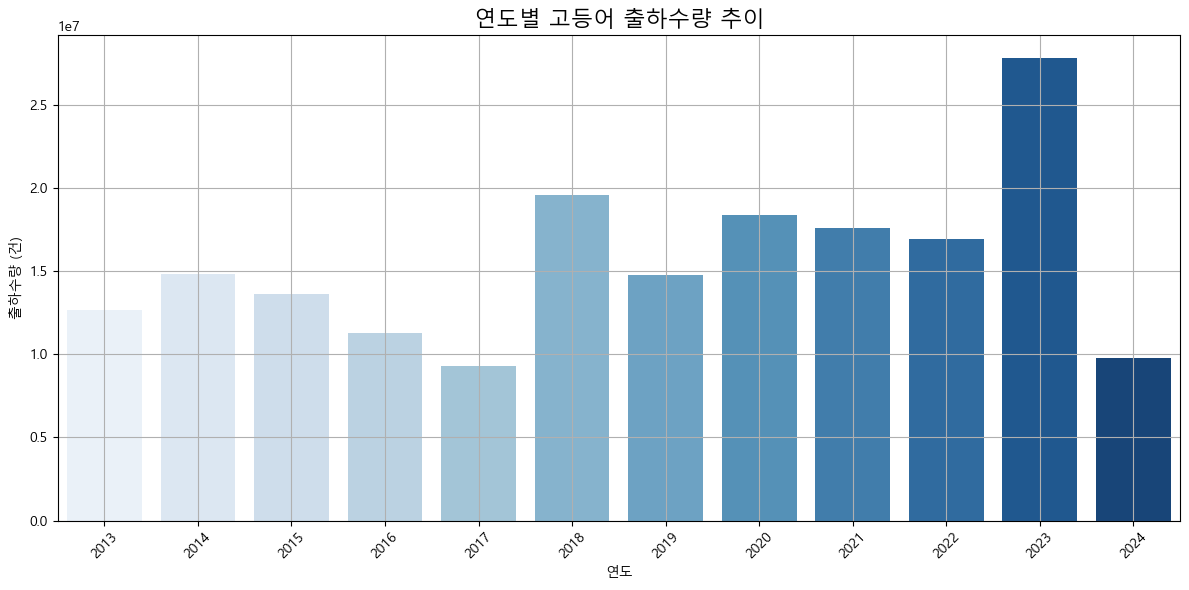

In [43]:
# 경고 제거
warnings.filterwarnings('ignore')

# 한글 글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

# 연도별 출하중량 집계
yearly_mackerel = df_merged.groupby('연도')['출하수량'].sum().reset_index()

# 2011, 2012 제외 (오류떠서 일시적으로 제외함)
yearly_mackerel = yearly_mackerel[~yearly_mackerel['연도'].isin([2011, 2012])]

# 시각화
plt.figure(figsize=(12,6))
sns.barplot(data=yearly_mackerel, x='연도', y='출하수량', palette='Blues')
plt.title('연도별 고등어 출하수량 추이', fontsize=16)
plt.xlabel('연도')
plt.ylabel('출하수량 (건)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

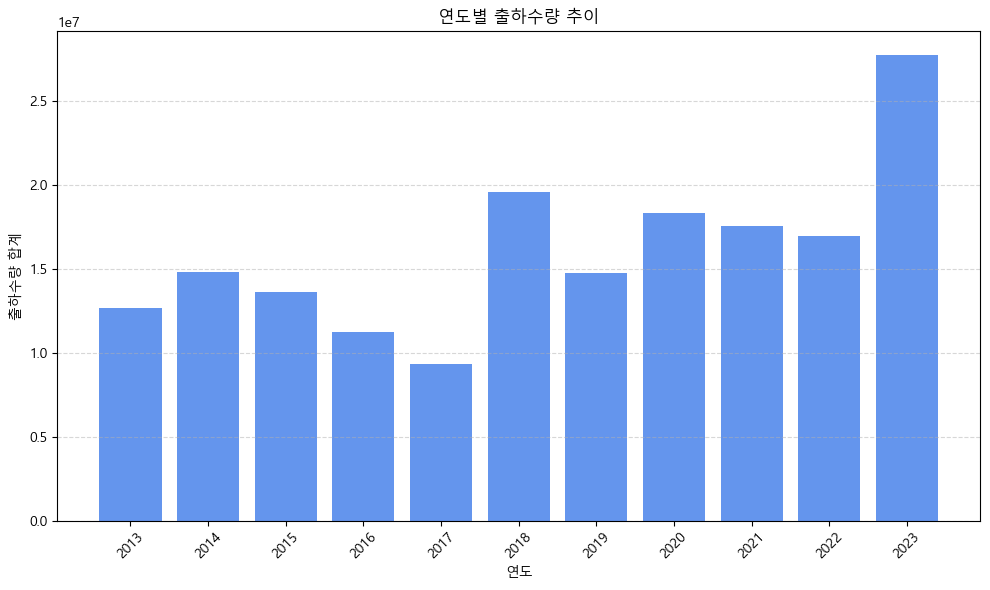

In [44]:

# 연도별 출하수량 합계 계산
yearly_total = df_filtered.groupby('연도')['출하수량'].sum().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(yearly_total['연도'], yearly_total['출하수량'], color='cornflowerblue')

plt.title('연도별 출하수량 추이')
plt.xlabel('연도')
plt.ylabel('출하수량 합계')

# x축에 모든 연도 표시
plt.xticks(yearly_total['연도'], rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




In [45]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612701 entries, 42831 to 655531
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   위판일자    612701 non-null  datetime64[ns]
 1   출하수량    612701 non-null  int64         
 2   출하중량    612701 non-null  int64         
 3   출하금액    612701 non-null  int64         
 4   산지명     612701 non-null  object        
 5   어업명     612701 non-null  object        
 6   어선번호    586821 non-null  float64       
 7   어선명     587872 non-null  object        
 8   상품코드    612701 non-null  int64         
 9   상품명     612701 non-null  object        
 10  산지코드    612603 non-null  float64       
 11  연도      612701 non-null  int32         
 12  월       612701 non-null  int32         
 13  일       612701 non-null  int32         
 14  연월      612701 non-null  object        
 15  선적항     612701 non-null  object        
 16  연중일     612701 non-null  int32         
dtypes: datetime64[ns](1), float64(

In [46]:
df_filtered.head(10)

#df

,위판일자,출하수량,출하중량,출하금액,산지명,어업명,어선번호,어선명,상품코드,상품명,산지코드,연도,월,일,연월,선적항,연중일
42831,2023-12-31,138,1520,5773000,제주도,근해자망어업,1.605008e+13,제369만진호,21004202,고등어,990000.0,2023,12,31,2023-12,제주시 추자면,365
42832,2023-12-31,138,1520,5773000,제주도,근해자망어업,1.605008e+13,제369만진호,21004199,고등어,990000.0,2023,12,31,2023-12,제주시 추자면,365
42833,2023-12-31,954,13568,160753000,제주도,근해자망어업,1.610008e+13,제72대동호,21004199,고등어,990000.0,2023,12,31,2023-12,제주시 추자면,365
42834,2023-12-31,954,13568,160753000,제주도,근해자망어업,1.610008e+13,제72대동호,21004202,고등어,990000.0,2023,12,31,2023-12,제주시 추자면,365
42835,2023-12-31,138,1520,5773000,제주도,근해자망어업,1.605008e+13,제369만진호,21004202,고등어,990000.0,2023,12,31,2023-12,제주시 추자면,365
42836,2023-12-31,11,90,741500,강원도,정치망어업,1.001643e+10,99영진호,21001206,고등어,920000.0,2023,12,31,2023-12,강원 양양군 현북면,365
42837,2023-12-31,600,9073,102745000,전라남도,근해자망어업,1.607030e+13,제308다성호,21003079,고등어,950000.0,2023,12,31,2023-12,전남 여수시,365
42838,2023-12-31,567,8612,112264000,전라남도,근해자망어업,2.090016e+12,민정호,21003079,고등어,950000.0,2023,12,31,2023-12,경남 사천시,365
42839,2023-12-31,537,8084,90124000,전라남도,근해자망어업,2.108004e+13,제105세훈호,21003079,고등어,950000.0,2023,12,31,2023-12,전남 여수시,365
42840,2023-12-31,537,8084,90124000,전라남도,근해자망어업,2.108004e+13,제105세훈호,21003079,고등어,950000.0,2023,12,31,2023-12,전남 여수시,365


In [47]:
a = df["위판일자"] == "2023-12-31"
df[a==True].info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 44025 to 44068
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   위판일자     44 non-null     object 
 1   경매장소코드   44 non-null     object 
 2   매수번호     44 non-null     int64  
 3   매수일련번호   44 non-null     int64  
 4   출하번호     44 non-null     int64  
 5   어업코드     44 non-null     int64  
 6   어업명      44 non-null     object 
 7   어선번호     44 non-null     float64
 8   어선명      44 non-null     object 
 9   상품코드     44 non-null     int64  
 10  상품명      44 non-null     object 
 11  어종상태코드   44 non-null     int64  
 12  어종상태명    44 non-null     object 
 13  산지코드     44 non-null     float64
 14  산지명      44 non-null     object 
 15  사업장명     44 non-null     object 
 16  조합명      44 non-null     object 
 17  원산지구분코드  44 non-null     int64  
 18  원산지구분명   44 non-null     object 
 19  출하수량     44 non-null     int64  
 20  출하중량     44 non-null     int64  
 21  출하금액     44 non-

In [48]:
a = df_filtered["위판일자"] == "2023-12-31"
df_filtered[a==True].info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 42831 to 42874
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   위판일자    44 non-null     datetime64[ns]
 1   출하수량    44 non-null     int64         
 2   출하중량    44 non-null     int64         
 3   출하금액    44 non-null     int64         
 4   산지명     44 non-null     object        
 5   어업명     44 non-null     object        
 6   어선번호    44 non-null     float64       
 7   어선명     44 non-null     object        
 8   상품코드    44 non-null     int64         
 9   상품명     44 non-null     object        
 10  산지코드    44 non-null     float64       
 11  연도      44 non-null     int32         
 12  월       44 non-null     int32         
 13  일       44 non-null     int32         
 14  연월      44 non-null     object        
 15  선적항     44 non-null     object        
 16  연중일     44 non-null     int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(4), 

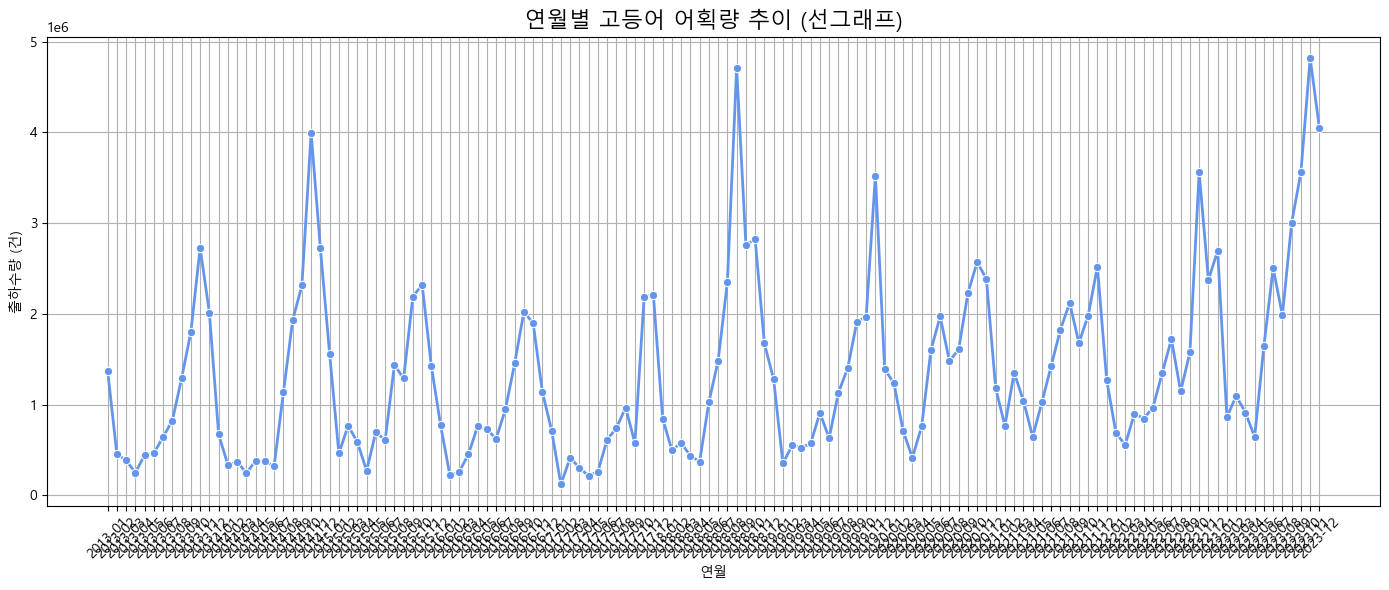

In [49]:
monthly_by_year = df_filtered.groupby('연월')['출하수량'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_by_year, x='연월', y='출하수량', marker='o', linewidth=2, color='cornflowerblue')
plt.title('연월별 고등어 어획량 추이 (선그래프)', fontsize=16)
plt.xlabel('연월')
plt.ylabel('출하수량 (건)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
df_filtered['상품명'].value_counts()


상품명
고등어     427779
고등어大    184922
Name: count, dtype: int64

In [51]:
df_filtered['상품명'].unique()


array(['고등어', '고등어大'], dtype=object)

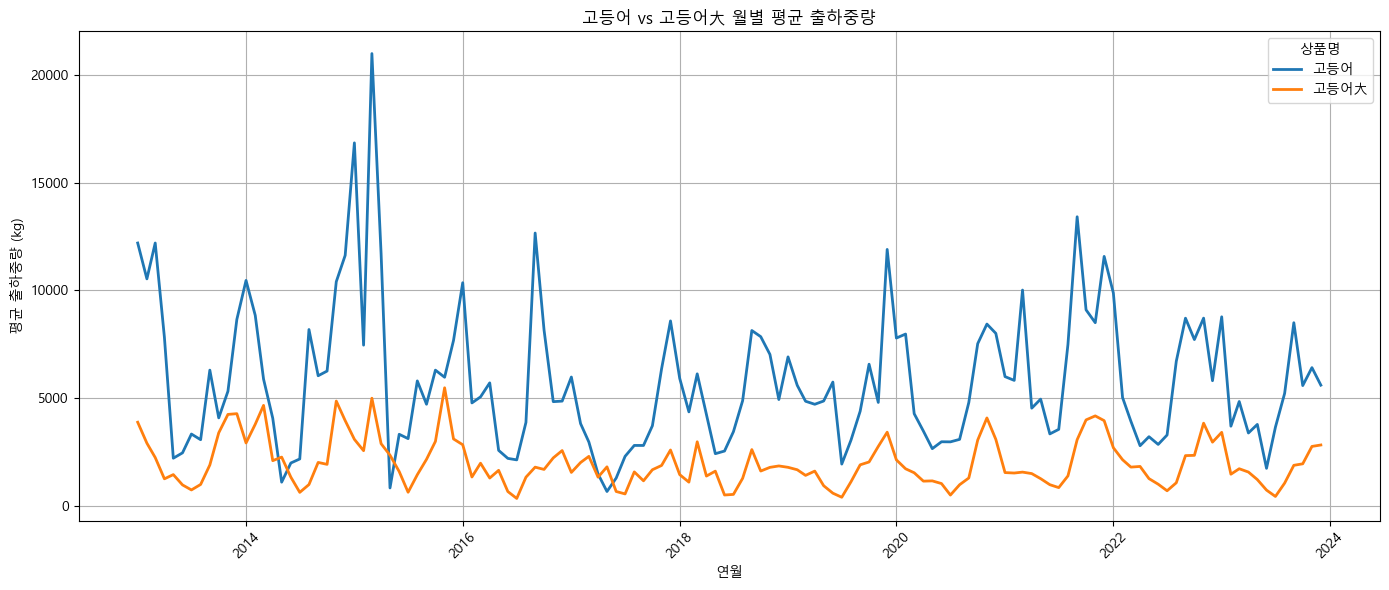

In [52]:
# 1. 고등어 & 고등어大만 필터링
df_filtered = df_filtered[df_filtered['상품명'].isin(['고등어', '고등어大'])]

# 2. 월별 평균 출하중량 계산
monthly_avg = df_filtered.groupby(['연월', '상품명'])['출하중량'].mean().reset_index()

# 3. 피벗 테이블로 상품명별 컬럼 분리
pivot_df = monthly_avg.pivot(index='연월', columns='상품명', values='출하중량').fillna(0)

# 4. 연월을 datetime으로 변환 후 정렬
pivot_df.index = pd.to_datetime(pivot_df.index, format='%Y-%m')
pivot_df = pivot_df.sort_index()

# 5. 선그래프 그리기
plt.figure(figsize=(14, 6))
for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], label=col, linewidth=2)

plt.title('고등어 vs 고등어大 월별 평균 출하중량')
plt.xlabel('연월')
plt.ylabel('평균 출하중량 (kg)')
plt.xticks(rotation=45)
plt.legend(title='상품명')
plt.grid(True)
plt.tight_layout()
plt.show()



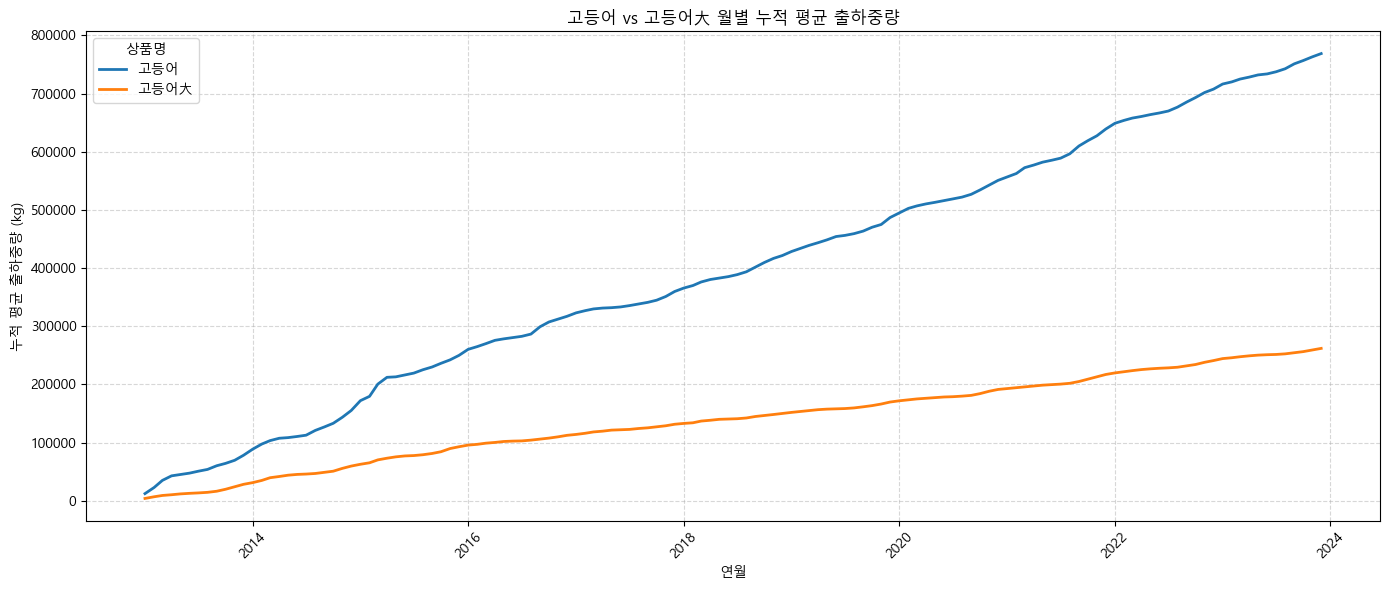

In [53]:
# 1. 고등어 & 고등어大만 필터링
df_filtered = df_filtered[df_filtered['상품명'].isin(['고등어', '고등어大'])]

# 2. 월별 평균 출하중량 계산
monthly_avg = df_filtered.groupby(['연월', '상품명'])['출하중량'].mean().reset_index()

# 3. 피벗 테이블로 상품명별 컬럼 분리
pivot_df = monthly_avg.pivot(index='연월', columns='상품명', values='출하중량').fillna(0)

# 4. 연월을 datetime으로 변환 후 정렬
pivot_df.index = pd.to_datetime(pivot_df.index, format='%Y-%m')
pivot_df = pivot_df.sort_index()

# 5. 누적합 계산
cumulative_df = pivot_df.cumsum()

# 6. 누적 선그래프 그리기
plt.figure(figsize=(14, 6))
for col in cumulative_df.columns:
    plt.plot(cumulative_df.index, cumulative_df[col], label=col, linewidth=2)

plt.title('고등어 vs 고등어大 월별 누적 평균 출하중량')
plt.xlabel('연월')
plt.ylabel('누적 평균 출하중량 (kg)')
plt.xticks(rotation=45)
plt.legend(title='상품명')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [54]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612701 entries, 42831 to 655531
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   위판일자    612701 non-null  datetime64[ns]
 1   출하수량    612701 non-null  int64         
 2   출하중량    612701 non-null  int64         
 3   출하금액    612701 non-null  int64         
 4   산지명     612701 non-null  object        
 5   어업명     612701 non-null  object        
 6   어선번호    586821 non-null  float64       
 7   어선명     587872 non-null  object        
 8   상품코드    612701 non-null  int64         
 9   상품명     612701 non-null  object        
 10  산지코드    612603 non-null  float64       
 11  연도      612701 non-null  int32         
 12  월       612701 non-null  int32         
 13  일       612701 non-null  int32         
 14  연월      612701 non-null  object        
 15  선적항     612701 non-null  object        
 16  연중일     612701 non-null  int32         
dtypes: datetime64[ns](1), float64(

In [80]:
buoy_df = pd.read_excel('./data/vessel_with_nearest_buoy.xlsx')
buoy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7538 entries, 0 to 7537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어선번호    7538 non-null   int64  
 1   어선명     7481 non-null   object 
 2   선적항     7538 non-null   object 
 3   위도      7538 non-null   float64
 4   경도      7538 non-null   float64
 5   지점명     7538 non-null   object 
 6   지점번호    7538 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 412.4+ KB


In [105]:
buoy_df_unique = buoy_df.drop_duplicates(subset=['어선명'])
buoy_df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4594 entries, 0 to 7537
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어선번호    4594 non-null   int64  
 1   어선명     4593 non-null   object 
 2   선적항     4594 non-null   object 
 3   위도      4594 non-null   float64
 4   경도      4594 non-null   float64
 5   지점명     4594 non-null   object 
 6   지점번호    4594 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 287.1+ KB


In [106]:
columns_to_add = ['어선명', '지점명', '지점번호','위도','경도']
mack_df = df_filtered.merge(buoy_df_unique[columns_to_add], on='어선명', how='left', suffixes=('', '_buoy'))
mack_df['지점번호'] = mack_df['지점번호'].astype('Int64')

In [101]:
mack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612701 entries, 0 to 612700
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   위판일자    612701 non-null  datetime64[ns]
 1   출하수량    612701 non-null  int64         
 2   출하중량    612701 non-null  int64         
 3   출하금액    612701 non-null  int64         
 4   산지명     591948 non-null  object        
 5   어업명     612701 non-null  object        
 6   어선번호    586821 non-null  float64       
 7   어선명     587872 non-null  object        
 8   상품코드    612701 non-null  int64         
 9   상품명     612701 non-null  object        
 10  산지코드    612603 non-null  float64       
 11  연도      612701 non-null  int32         
 12  월       612701 non-null  int32         
 13  일       612701 non-null  int32         
 14  연월      612701 non-null  object        
 15  선적항     583121 non-null  object        
 16  지점명     609249 non-null  object        
 17  지점번호    609249 non-null  Int6

In [107]:
import os

path = './data/hydroclimate_data/'
dir_list = os.listdir(path)
dir_list
hydro_climate = pd.DataFrame()
for dir in dir_list:
  tmp_df = pd.read_excel(path + dir)
  hydro_climate = pd.concat([hydro_climate,tmp_df])



In [108]:
list(mack_df.columns)
hydro_climate = hydro_climate.rename(columns = {'지점':'지점번호'})
mack_df = mack_df.rename(columns={'위판일자': '일자'})
mack_df.columns = mack_df.columns.str.strip()
hydro_climate.columns = hydro_climate.columns.str.strip()

In [ ]:
# climate info
columns_to_add = list(hydro_climate.columns)
mack_hc_df = mack_df.merge(hydro_climate[columns_to_add], on=['지점번호','일자'], how='left', suffixes=('', '_hydro'))

In [111]:
hydro_climate.info()
mack_hc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68858 entries, 0 to 2842
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   지점번호      68858 non-null  int64         
 1   일자        68858 non-null  datetime64[ns]
 2   평균기압      68858 non-null  float64       
 3   평균 상대습도   68858 non-null  float64       
 4   평균 기온     68858 non-null  float64       
 5   평균 수온     68858 non-null  float64       
 6   평균 최대 파고  68858 non-null  float64       
 7   평균 유의 파고  68858 non-null  float64       
 8   최고 유의 파고  68858 non-null  float64       
 9   최고 최대 파고  68858 non-null  float64       
 10  평균 파주기    68858 non-null  float64       
 11  최고 파주기    68858 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 6.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613084 entries, 0 to 613083
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    ----------

In [115]:
mack_df.loc[mack_df['지점명'].isnull(),:].to_excel('./loc_null.xlsx')

In [ ]:
mac_df = mack_hc_df.loc[mack_hc_df['어선명'].isin(mack_hc_df['어선명'].dropna().unique()), :]
mac_df = mac_df.reset_index(drop=True)

In [116]:
from geopy.distance import geodesic

def fill_missing(row, df, geo_df, column):
    date = row['일자']
    origin = (row['위도'], row['경도'])

    # 같은 날짜에 값이 있는 다른 지점들
    candidates = df[
        (df['일자'] == date) &
        (~df[column].isnull())
    ]

    # 거리 계산
    candidates['거리'] = candidates.apply(
        lambda r: geodesic(origin, (r['위도'], r['경도'])).km,
        axis=1
    )

    # 가장 가까운 지점의 값 반환
    if not candidates.empty:
        return candidates.sort_values('거리').iloc[0][column]
    else:
        return None


ModuleNotFoundError: No module named 'geopy'

In [88]:
geo_df = mack_hc_df[['지점명', '어선명']].drop_duplicates()
missing_df = mack_hc_df[mack_hc_df['평균 기온'].isnull()]


In [ ]:
geo_df

,지점명,어선명
0,추자도,제369만진호
2,추자도,제72대동호
5,고성,99영진호
6,통영,제308다성호
7,거제도,민정호
...,...,...
611946,고성,제308광성호
612663,외연도,제1창국호
612664,고성,제4동해호
612969,덕적도,제27금영호


In [ ]:
mac_df.loc[:10000,:].to_excel('./mack_hc.xlsx')

In [89]:
null_one = mac_df.loc[mac_df['지점번호'].isnull() | mac_df['평균 기온'].isnull(),:]

In [90]:
null_one.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211167 entries, 44 to 588254
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   일자        211167 non-null  datetime64[ns]
 1   출하수량      211167 non-null  int64         
 2   출하중량      211167 non-null  int64         
 3   출하금액      211167 non-null  int64         
 4   산지명       201668 non-null  object        
 5   어업명       211167 non-null  object        
 6   어선번호      209787 non-null  float64       
 7   어선명       211167 non-null  object        
 8   상품코드      211167 non-null  int64         
 9   상품명       211167 non-null  object        
 10  산지코드      211085 non-null  float64       
 11  연도        211167 non-null  int32         
 12  월         211167 non-null  int32         
 13  일         211167 non-null  int32         
 14  연월        211167 non-null  object        
 15  선적항       207223 non-null  object        
 16  지점명       207715 non-null  object        


In [99]:
mac_df.loc[mac_df['산지명'].isin(mac_df['산지명'].dropna().unique())==False,:].to_excel('./null.xlsx')

In [ ]:
# 고유한 어업명 리스트 출력
어업종류 = df_org['어업명'].dropna().unique()

# 보기 좋게 출력
for i, name in enumerate(어업종류, 1):
    print(f"{i}. {name}")



1. 정치망어업
2. 소형선망어업
3. 근해자망어업
4. 연안자망어업
5. 대형정치망
6. 기타어업
7. 쌍끌이대형기선저인망어업
8. 정치성구획어업
9. 연안복합어업
10. 근해채낚기어업
11. 연안채낚기어업
12. 연안연승어업
13. 각망어업
14. 연안통발어업
15. 중형정치망어업
16. 근해연승어업
17. 자망어업
18. 통발어업
19. 기타구획
20. 유자망어업
21. 근해선망어업
22. 대형선망어업
23. 연안들망어업
24. 연안선망어업
25. 쌍끌이서남해구기선저인망어업
26. 맨손어업
27. 근해통발어업
28. 연승어업
29. 동해구기선저인망어업
30. 호망어업
31. 근해유자망어업
32. 양식업
33. 대형트롤어업
34. 외끌이서남해구기선저인망어업
35. 해상가두리양식어업
36. 근해트롤어업
37. 외끌이대형기선저인망어업
38. 근해안강망어업
39. 연안개량안강망어업
40. 연안안강망어업
41. 승망어업
42. 어류등양식어업
43. 낭장망어업
44. 연안어업
45. 동해구트롤어업
46. 중형기선저인망
47. 천해양식어업
48. 패류양식어업
49. 근해어업
50. 원양,담수어업
51. 어선업
52. 새우조망어업
53. 건강망어업
54. 대형기선저인망
55. 패류형망어업
56. 복합양식어업
57. 기선권현망어업
58. 주목망어업
59. 연안쌍끌이선인망어업
60. 해조류양식어업
61. 전복양식업
62. 가공업
63. 마을어업
64. 수산제조업
65. 장어통발어업
66. 육상양식어업
67. 안강망어업
68. 낚시어선어업
69. 협동양식어업
70. 기타통발어업
71. 제2종양식(해상가두리)
72. 근해봉수망어업
73. 잠수기어업
74. 연안유자망어업
75. 나잠어업
76. 패,조류채취어업
